<a href="https://colab.research.google.com/github/gabipasse/ComputationalVision-opencv/blob/main/visao_computacional_reconhecimento_texto_ocr_opencv_PROJETO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9


In [ ]:
! git clone https://github.com/sthemonica/text-recognize


Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 148 (delta 34), reused 140 (delta 30), pack-reused 0
Receiving objects: 100% (148/148), 37.21 MiB | 21.75 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
import pytesseract
import numpy as np
import cv2
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow


In [ ]:
pytesseract.__version__

'0.3.9'

In [ ]:
cv2.__version__

'4.8.0'

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true


--2023-08-22 13:06:20--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-08-22 13:06:20--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-08-22 13:06:20--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, a

In [ ]:
projeto = "/content/text-recognize/Imagens/Projeto"
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(caminho)


['/content/text-recognize/Imagens/Projeto/artigo-spark.png', '/content/text-recognize/Imagens/Projeto/artigo-desbalanceamento.png', '/content/text-recognize/Imagens/Projeto/artigo-eng-dados.png', '/content/text-recognize/Imagens/Projeto/artigo-termos-ML.png']


In [ ]:
def mostrar(img):
  fig = plt.gcf() # busca a figura atual
  fig.set_size_inches(20, 10) #define o tamanho
  plt.axis("off") #remove a visualização dos eixos
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #faz a conversão de cores com o OpenCV
  plt.show() # mostra a imagem


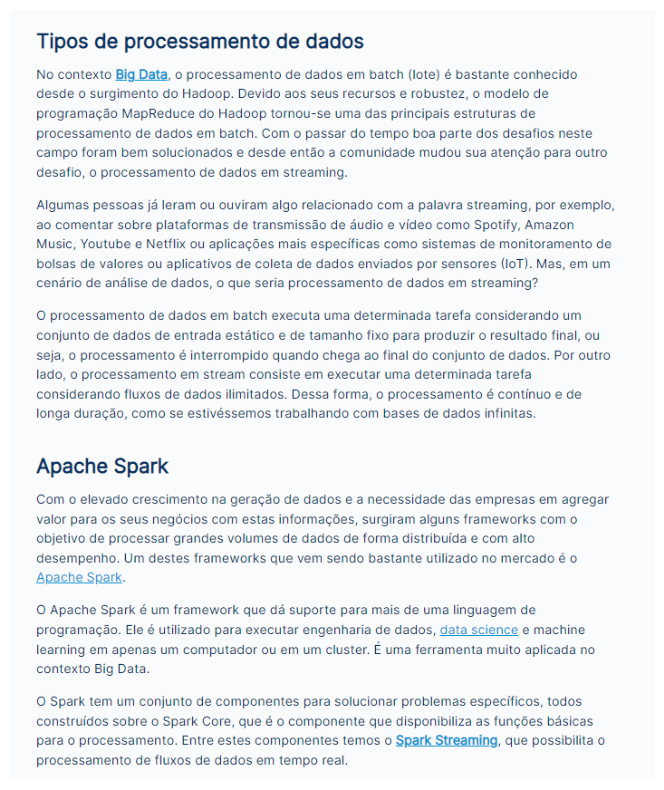

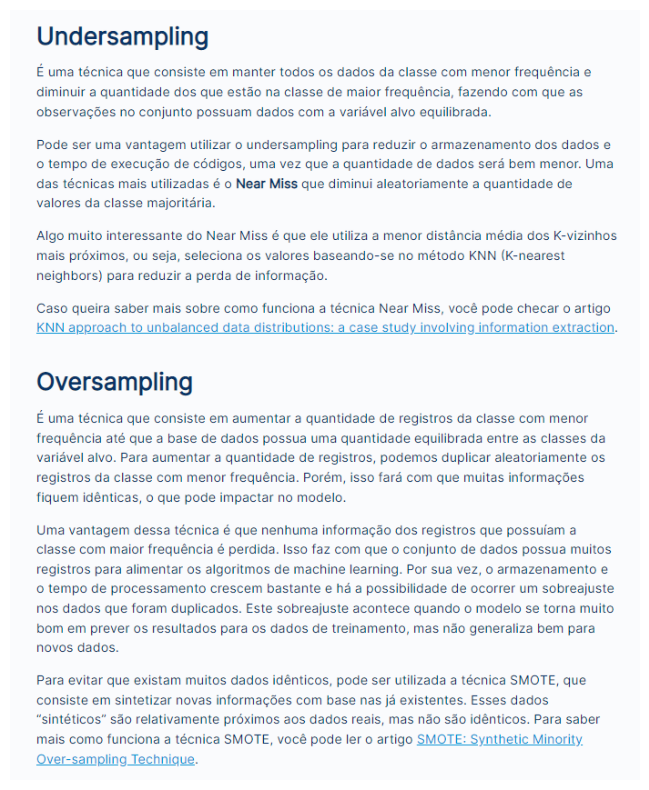

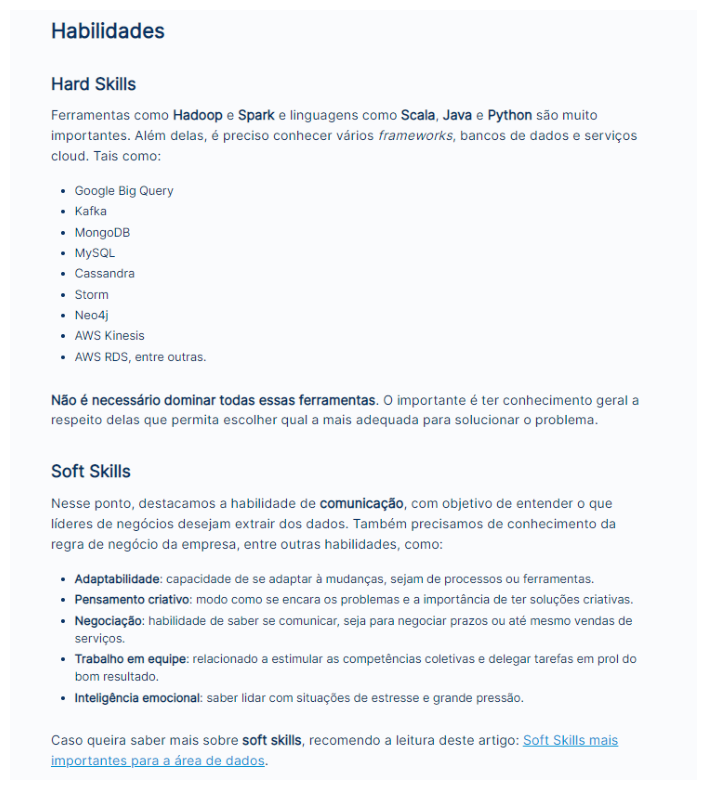

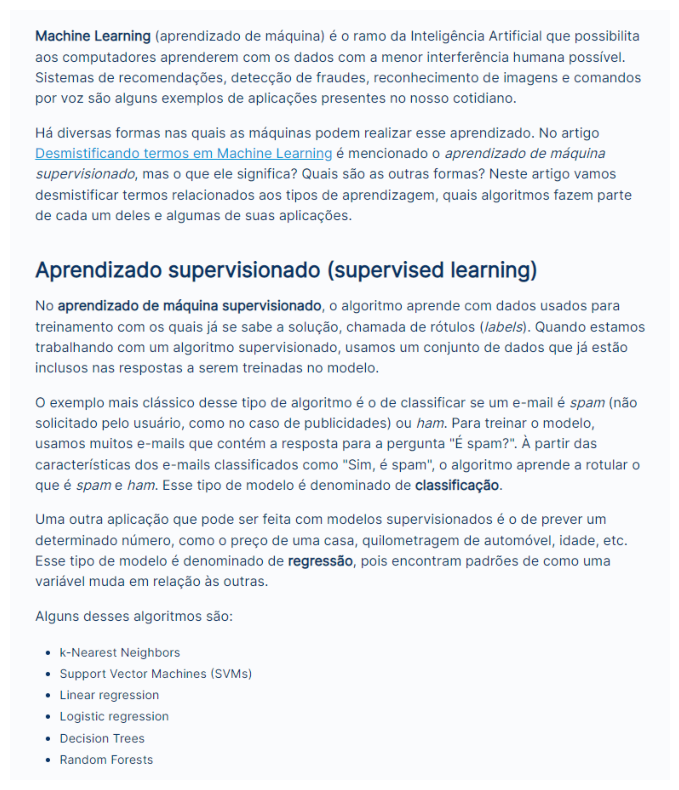

In [ ]:
for imagem in caminho:
  imagem = cv2.imread(imagem)
  mostrar(imagem)


In [ ]:
if 'TESSDATA_PREFIX' in os.environ:
    del os.environ['TESSDATA_PREFIX']

In [ ]:
config_tesseract = '--tessdata-dir /content/tessdata'

In [ ]:
def OCR_processa(img, config_tesseract):
  texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return texto

In [ ]:
texto_completo = ''

nome_txt = 'resultados_ocr.txt'


In [ ]:
for imagem in caminho: # percorre as imagens no caminho
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1] ## recebe os nomes e diretórios das imagens, quebrados, precisamos apenas do -1 (última posição do diretório)
  nome_divisao = '===================\n' + str(nome_imagem) #divisão + nome da imagem que está sendo vista
  texto_completo = texto_completo + nome_divisao + '\n' # recebe o texto completo + a divisão + /n para pular a linha
  texto = OCR_processa(img, config_tesseract) #passa a imagem que vamos utilizar, no caso em cada imagem
  texto_completo = texto_completo + texto # concatena as duas variáveis


In [ ]:
print(texto_completo)

In [ ]:
## Salvando o arquivo em txt
arquivo_txt = open(nome_txt, 'w+') # a+ é para colocar no final do arquivo, w+ para sobre escrever o arquivo
arquivo_txt.write(texto_completo + '\n') #passa o texto que quer adicionar
arquivo_txt.close()


In [ ]:
termo_pesquisa = 'learning'

In [ ]:
with open(nome_txt) as f: # abre o documento txt
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())] #ocorrencia é uma lista.
  #inicia-se em i e o termo re é de expressões regulares, o módulo finditer é para encontrar um termo de pesquisa dentro do arquivo
  #por isso os parâmetros são, respectivamente, termo_pesquisa e arquivo a ser lido.

In [ ]:
ocorrencias

[2062, 4126, 7046]

In [ ]:
for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('====================\n' + str(nome_imagem)) # separação + nome da imagem

  texto = OCR_processa(img, config_tesseract) #usando o OCR

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)] #usando o finditer novamente no texto

  print('Número de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias)))
  #primeira chaves é para termo de pesquisa e a segunda é para ocorrencias
  print('\n')



artigo-spark.png
Número de ocorrências para o termo: learning: 1


artigo-desbalanceamento.png
Número de ocorrências para o termo: learning: 1


artigo-eng-dados.png
Número de ocorrências para o termo: learning: 0


artigo-termos-ML.png
Número de ocorrências para o termo: learning: 1




In [ ]:
projeto = "/content/text-recognize/Atividades/Aula 5"
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(caminho)

['/content/text-recognize/Atividades/Aula 5/Aula5-Visao.png', '/content/text-recognize/Atividades/Aula 5/Aula5-Microstrategy.png', '/content/text-recognize/Atividades/Aula 5/Aula5-Ambientes_Virtuais.png', '/content/text-recognize/Atividades/Aula 5/Aula5-ROC.png', '/content/text-recognize/Atividades/Aula 5/Aula5-GitHub.png']


In [ ]:
texto_completo = ''

termo_pesquisa = 'ambiente'

In [ ]:
for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('====================\n' + str(nome_imagem)) # separação + nome da imagem

  texto = OCR_processa(img, config_tesseract) #usando o OCR

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)] #usando o finditer novamente no texto

  print('Número de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias)))
  #primeira chaves é para termo de pesquisa e a segunda é para ocorrencias
  print('\n')

In [ ]:
fonte = "/content/text-recognize/Imagens/calibri.ttf"

In [ ]:
def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 255), tamanho=16):
  fonte = ImageFont.truetype(fonte_dir, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y-tamanho), texto, font = fonte, fill = cor)
  img = np.array(img_pil)

  return img


In [ ]:
min_conf = 30

In [ ]:
def caixa_texto(i, resultado, img, cor=(255, 100, 0)):
  x = resultado["left"][i]
  y = resultado["top"][i]
  w = resultado["width"][i]
  h = resultado["height"][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img


In [ ]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT) #imagem para dados, que já fizemos anteriormente
  num_ocorrencias = 0 #inicializando como 0

  for i in range(0, len(resultado['text'])): # vai de 0 ao tamanho do número de valores do texto
    confianca = int(resultado['conf'][i]) # qual a confiança da detecção
    if confianca > min_conf: # se a confiança for maior que o valor mínimo, passa para a linha abaixo
      texto = resultado['text'][i] #texto será igual ao resultado text no momento i
      if re.search(termo_pesquisa, texto, re.IGNORECASE): #se o termo de pesquisa estiver no texto:
        x, y, img = caixa_texto(i, resultado, img, (0,0,255)) # faz a caixa de bounding box
        img = escreve_texto(texto, x, y, img, fonte, (50,50,225), 14) #escreve o texto

        num_ocorrencias += 1 #faz a iteração no num de ocorrências e volta para o laço até acabar o texto
  return img, num_ocorrencias


Aula5-Visao.png
Número de ocorrências para learning em Aula5-Visao.png: 2




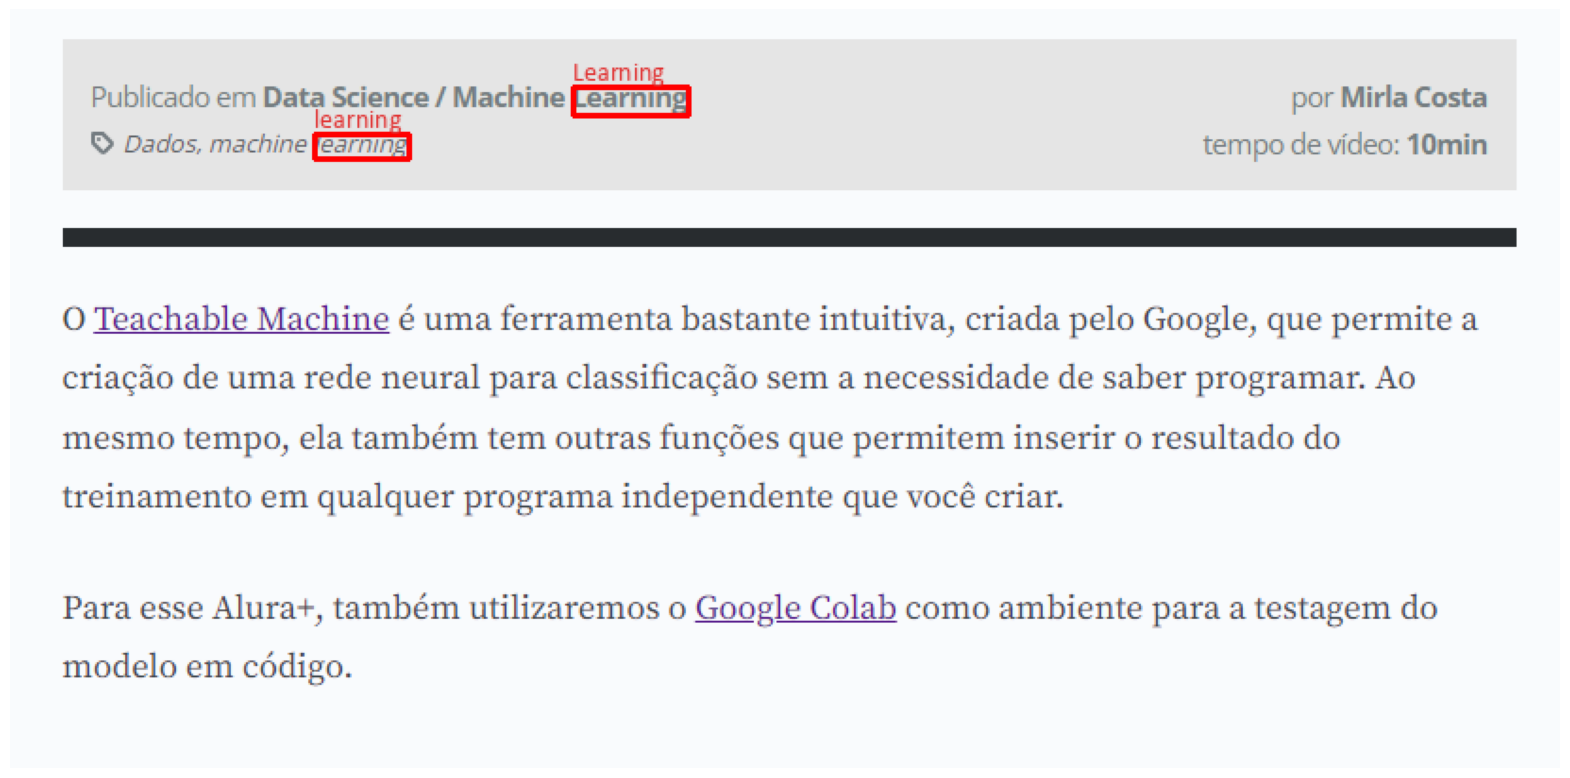

Aula5-Microstrategy.png
Número de ocorrências para learning em Aula5-Microstrategy.png: 0




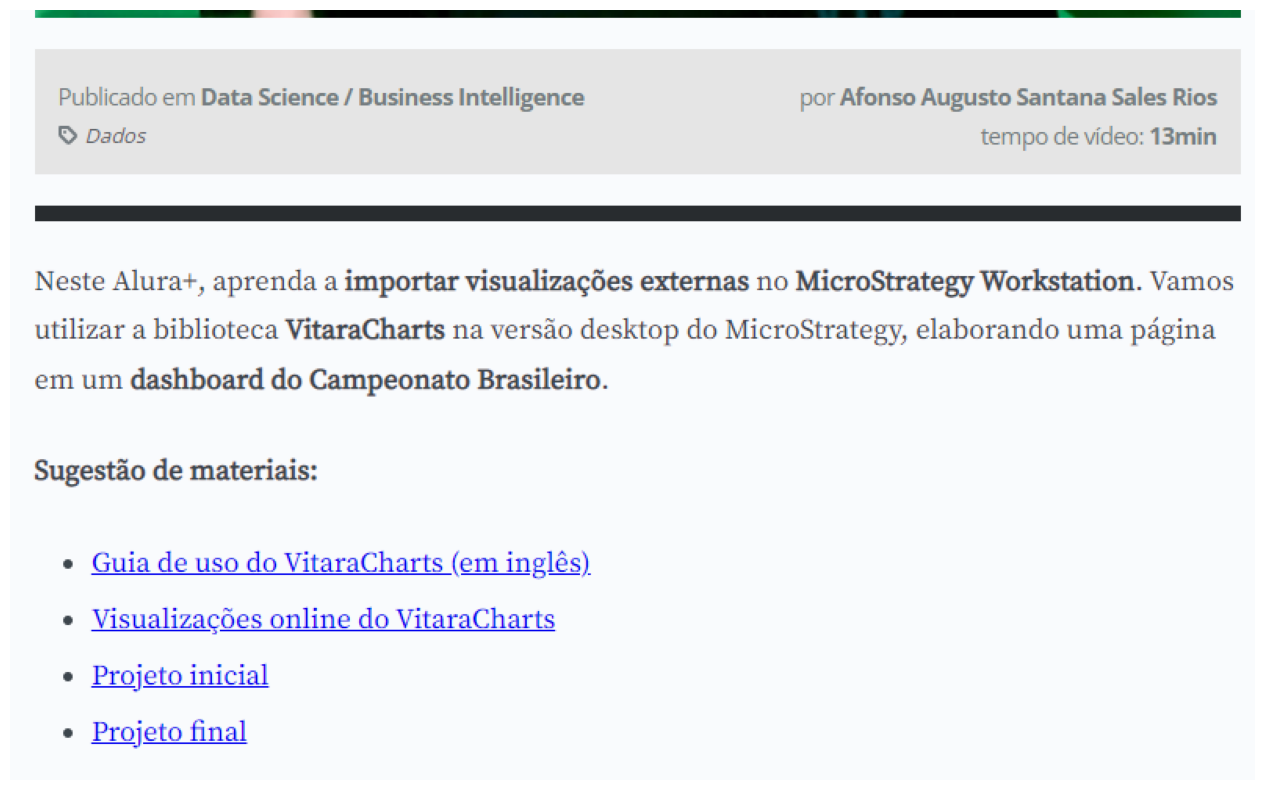

Aula5-Ambientes_Virtuais.png
Número de ocorrências para learning em Aula5-Ambientes_Virtuais.png: 0




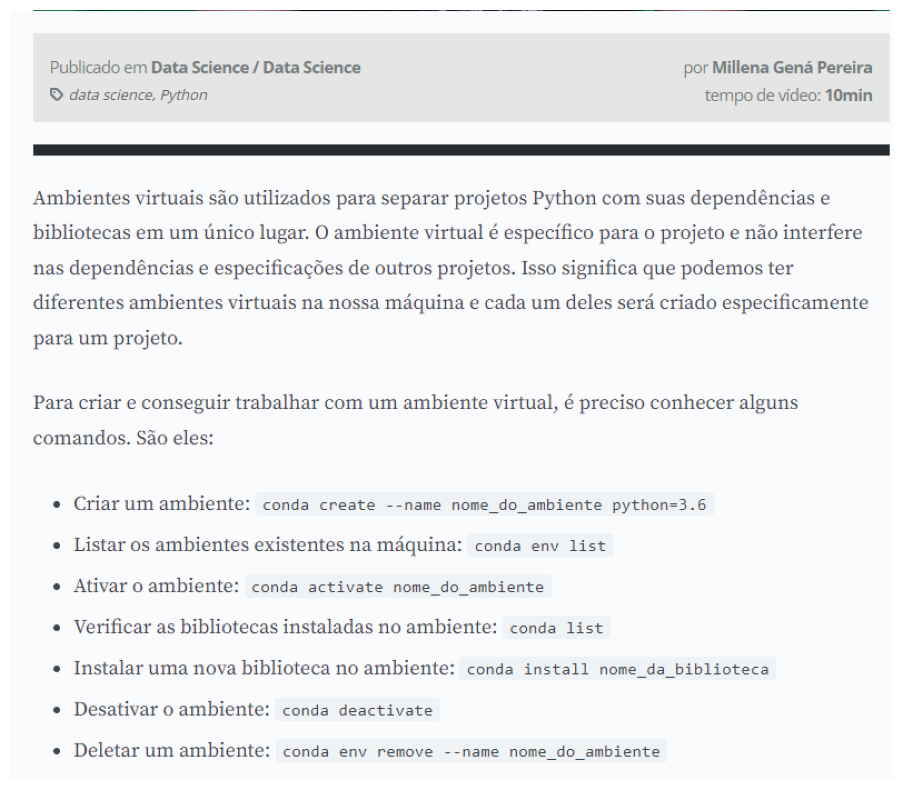

Aula5-ROC.png
Número de ocorrências para learning em Aula5-ROC.png: 1




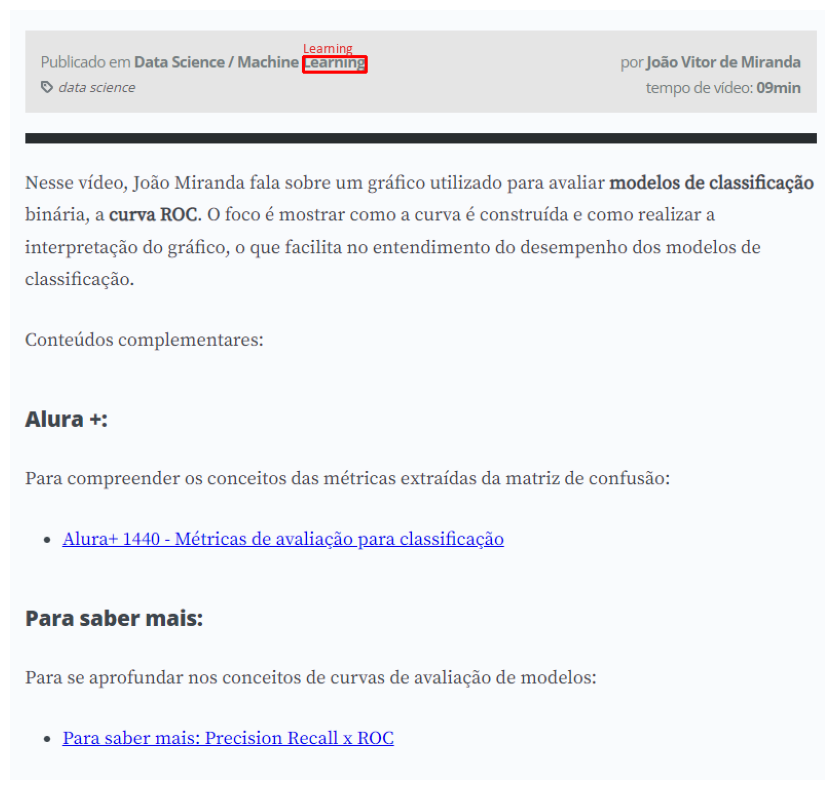

Aula5-GitHub.png
Número de ocorrências para learning em Aula5-GitHub.png: 0




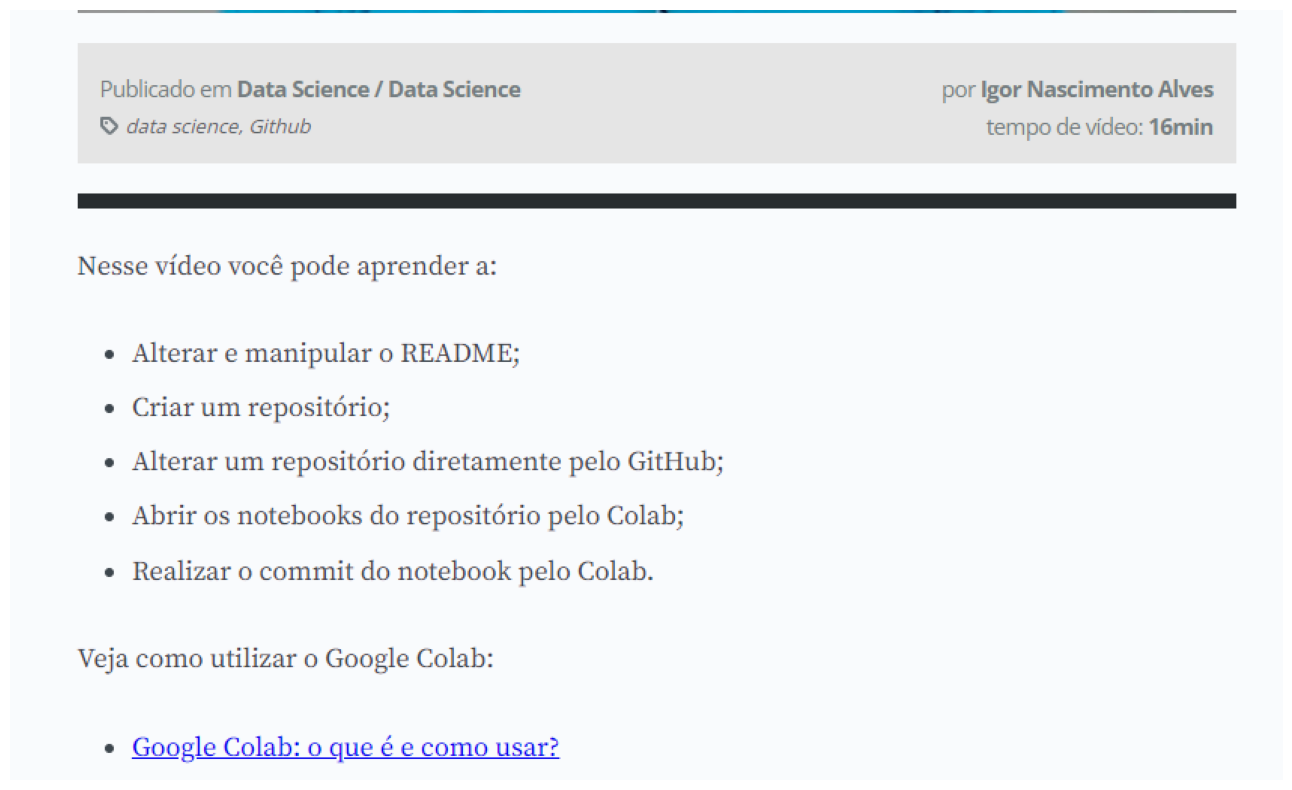

In [ ]:
termo_pesquisa = 'learning'

for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  img_original = img.copy() #cria uma cópia da imagem para não escrever em cima da original

  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('===================\n' + str(nome_imagem))  # separação + nome da imagem

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf) #usando o OCR_processa_imagem
  print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
    #primeira chaves é para termo de pesquisa e a segunda nome das imagens e a terceira é o numeros de ocorrencias
  print('\n')

  mostrar(img)


In [ ]:
os.makedirs('images_project', exist_ok=True)

In [ ]:
termo_pesquisa = 'learning'
for imagem in caminho:
  img = cv2.imread( imagem)
  img_original = img.copy()
  nome_imagem = os.path.split(imagem)[-1]
  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf)
  if numero_ocorrencias > 0:
    mostrar (img)
    novo_nome_imagem = 'OCR_' + nome_imagem
    nova_imagem = 'images_project/' + str(novo_nome_imagem)
    cv2.imwrite(nova_imagem, img)